# **Exercise Sheet 7:** Final Exercise

In this last exercise, we will use different techniques that we have learned over the course of this lecture to analyze and predict classes in a medical dataset.

In [ ]:
# Imports
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

### Data tryouts

In [19]:
# Solution
df = pd.read_csv('thyroid_recurrence.csv')

In [20]:
print(df.shape)
df.head()

(383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [21]:
print("Features:")
print(df.columns.tolist())

Features:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [ ]:
# Aids dataset
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 

print(X.shape)
print(y.shape)

# Display the distribution of target values
print("Target value distribution:")
print(y['cid'].value_counts())

# Optionally, show percentage distribution
print("\nPercentage distribution:")
print(y['cid'].value_counts(normalize=True).round(3) * 100, "%")

(2139, 23)
(2139, 1)
Target value distribution:
cid
0    1618
1     521
Name: count, dtype: int64

Percentage distribution:
cid
0    75.6
1    24.4
Name: proportion, dtype: float64 %


In [23]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
print(X.shape)
print(y.shape)

# Display the distribution of target values
print("Target value distribution:")
print(y['Diabetes_binary'].value_counts())

# Optionally, show percentage distribution
print("\nPercentage distribution:")
print(y['Diabetes_binary'].value_counts(normalize=True).round(3) * 100, "%")

(253680, 21)
(253680, 1)
Target value distribution:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

Percentage distribution:
Diabetes_binary
0    86.1
1    13.9
Name: proportion, dtype: float64 %


In [24]:
# Combine the diabetes features (X) and target (y) into one dataframe
diabetes_df = X.copy()
diabetes_df['Diabetes'] = y['Diabetes_binary']

# Get balanced subset
diabetes_yes = diabetes_df[diabetes_df['Diabetes'] == 1]
diabetes_no = diabetes_df[diabetes_df['Diabetes'] == 0].sample(n=len(diabetes_yes), random_state=42)

balanced_df = pd.concat([diabetes_yes, diabetes_no])
# Then sample 50k if needed
final_df = balanced_df.sample(n=50000, random_state=42)

# Display the first few rows of the combined dataframe
print(f"Combined dataframe shape: {diabetes_df.shape}")
print(final_df.head())

# Display value counts of the target variable
print("Target value distribution:")
print(final_df['Diabetes'].value_counts())

final_df.to_csv('diabetes_data.csv', index=False)

Combined dataframe shape: (253680, 22)
        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
146026       0         0          1   28       1       0   
146849       1         1          1   39       0       0   
174834       1         1          1   37       0       0   
17120        1         0          1   27       0       0   
249064       0         0          1   26       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
146026                     0             1       1        1  ...            0   
146849                     0             0       1        1  ...            0   
174834                     0             0       1        1  ...            0   
17120                      0             1       1        1  ...            0   
249064                     0             1       0        1  ...            0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  \
146026        1         0         0


### a) Load the dataset
- Load `tyhroid_recurrence.csv` dataset and explore it
- What outcomes do you want to predict? How many classes are available?
- What features are available? Are there any missing values?

Note: Info about dataset 
- https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence
- https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

In [25]:
# Student Code

In [7]:
# Load dataset
diabetes_df = pd.read_csv('diabetes_data.csv').sample(n=10000, random_state=42)

In [8]:
print(diabetes_df.shape)
diabetes_df.head()

(10000, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
33553,0,0,1,31,0,0,0,1,0,1,...,0,1,0,0,0,1,2,5,6,0
9427,0,0,1,21,0,0,0,1,1,1,...,0,1,0,1,0,0,5,6,7,0
199,1,1,1,27,0,0,0,1,1,0,...,0,3,0,3,0,1,9,4,1,1
12447,0,0,1,26,1,0,0,1,1,1,...,0,1,0,0,0,1,4,6,7,0
39489,0,0,1,33,0,0,0,1,1,1,...,0,3,0,2,0,1,6,6,8,0


In [9]:
print("Features:")
print(diabetes_df.columns.tolist())

Features:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes']


In [10]:
print(diabetes_df['Diabetes'].value_counts())

Diabetes
0    5014
1    4986
Name: count, dtype: int64


In [11]:
X = diabetes_df.drop(columns=['Diabetes'])
y = diabetes_df['Diabetes']

### b) Plot the data using PCA
- Do the classes form clusters using a linear dimensionality reduction method (PCA)?
- Comment the plot

In [12]:
# Student code

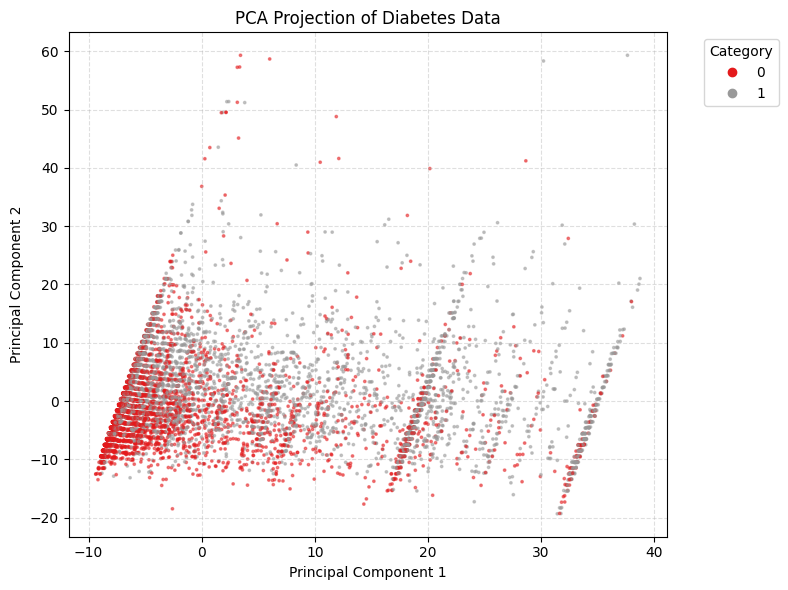

In [13]:
# Perform PCA on the training data
from sklearn.decomposition import PCA
from helper import plot_projection

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plot the PCA projection
plot_projection(X_pca, y, title='PCA Projection of Diabetes Data', xlabel='Principal Component 1', ylabel='Principal Component 2')

### c) Plot the data using t-SNE
- Do the classes form clusters using a non-linear dimensionality reduction method (t-SNE)?
- Comment the plot

In [14]:
# Student code

In [15]:
# Perform t-SNE on the training data
# TODO: adjust this maybe because t-sne takes forever
from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, random_state=42)
#X_tsne = tsne.fit_transform(X)

# Plot the t-SNE projection
#plot_projection(X_tsne, y, title='t-SNE Projection of Diabetes Data', xlabel='t-SNE Component 1', ylabel='t-SNE Component 2')

### d) Split the data into Training and Test set
- Use a 80/20 split
- Why do we split the data?

In [16]:
# Student Code

In [17]:
# Split into training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We split the dataset for unbiased evaluation of the model performance. The training set is used to train the model, while the test set is used to evaluate its performance on unseen data.

### e) Should you normalize the data?
- If so, do it!

In [18]:
# Student Code

In [19]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Yes! In this case our dataset contains different scales and units, therefore it makes sense to normalize it for an unbiased usage of the features and improved model performance.

### f) Fit a logistic regression with Lasso and Ridge penalty
- Optimize the alpha parameter as learnt
- Report the accuracy on the test set and plot ROC

In [20]:
# Student code

In [21]:
# Lasso Classifier CV
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
alphas = np.logspace(-4, 4, 10)  # Example range of alphas
lasso_cv = LogisticRegressionCV(Cs=alphas, penalty='l1', solver='liblinear', cv=5, random_state=42, scoring='accuracy')
lasso_cv = lasso_cv.fit(X_train_scaled, y_train)

In [22]:
# Ridge Classifier CV
from sklearn.linear_model import RidgeClassifierCV
ridge_cv = RidgeClassifierCV(alphas=alphas, scoring='accuracy', store_cv_results=True)
ridge_cv = ridge_cv.fit(X_train_scaled, y_train)

In [23]:
# Report accuracies
print("Lasso Classifier CV Accuracy:", lasso_cv.score(X_test_scaled, y_test))
print("Ridge Classifier CV Accuracy:", ridge_cv.score(X_test_scaled, y_test))

Lasso Classifier CV Accuracy: 0.749
Ridge Classifier CV Accuracy: 0.7465


ROC-AUC PERFORMANCE
Lasso:
  Cross-validation AUC: 0.815 (±0.013)
  ROC AUC: 0.814

Ridge:
  Cross-validation AUC: 0.817 (±0.015)
  ROC AUC: 0.815



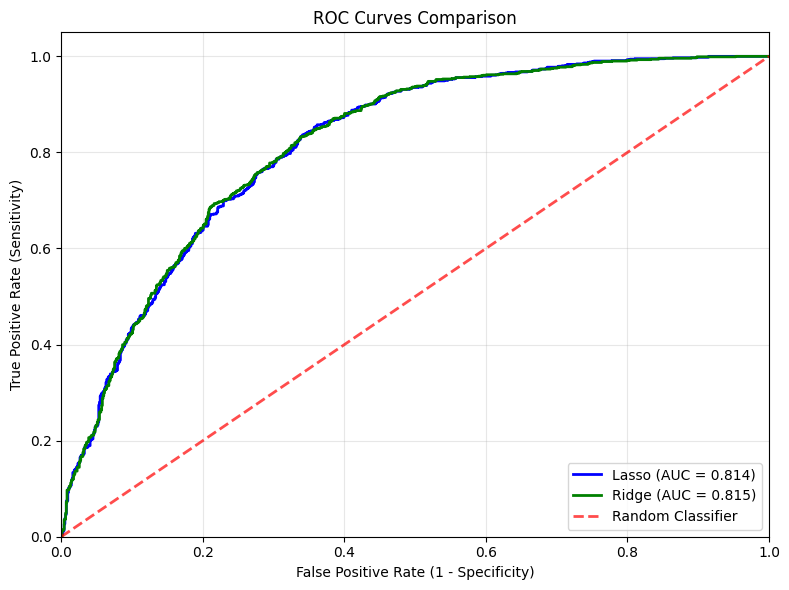

In [24]:
# Plot ROC
from helper import evaluate_roc
evaluate_roc(X_test_scaled, y_test, models=[lasso_cv, ridge_cv], model_names=['Lasso', 'Ridge'])

### g) Fit a random forest
- Report the accuracy on the test set and plot ROC

In [25]:
# Student code

In [26]:
# Fit a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = rf.fit(X_train_scaled, y_train)


In [27]:
# Report Accuracy
print("Random Forest CV Accuracy:", rf.score(X_test_scaled, y_test))

Random Forest CV Accuracy: 0.721


ROC-AUC PERFORMANCE
Random Forest:
  Cross-validation AUC: 0.795 (±0.012)
  ROC AUC: 0.794



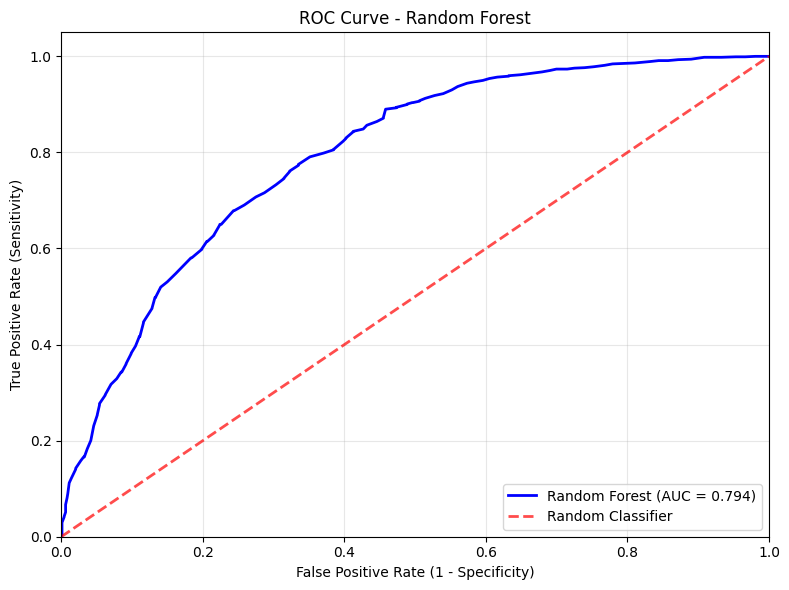

In [28]:
# Plot ROC
evaluate_roc(X_test_scaled, y_test, model=rf, model_name='Random Forest')

### h) Fit an SVM 
- Optimize the C parameter as learnt
- Try different Kernels (linear, RBF)
- Report the accuracy on the test set and plot ROC

In [29]:
# Student code 

In [30]:
# Define params for grid search svm
params = {
    'C': [0.1, 1, 10],
}

In [31]:
# Evaluate SVM with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42)
grid_search = GridSearchCV(svm, params, cv=5, scoring='accuracy')
grid_search = grid_search.fit(X_train_scaled, y_train)

# Report best params
print("Best SVM Params:", grid_search.best_params_)
svm_best = grid_search.best_estimator_
svm_best = svm_best.fit(X_train_scaled, y_train)

Best SVM Params: {'C': 1}


In [32]:
# Report accuracy
print("SVM Grid Search CV Accuracy:", grid_search.score(X_test_scaled, y_test))

SVM Grid Search CV Accuracy: 0.748


ROC-AUC PERFORMANCE
SVM Grid Search:
  Cross-validation AUC: 0.802 (±0.010)
  ROC AUC: 0.801



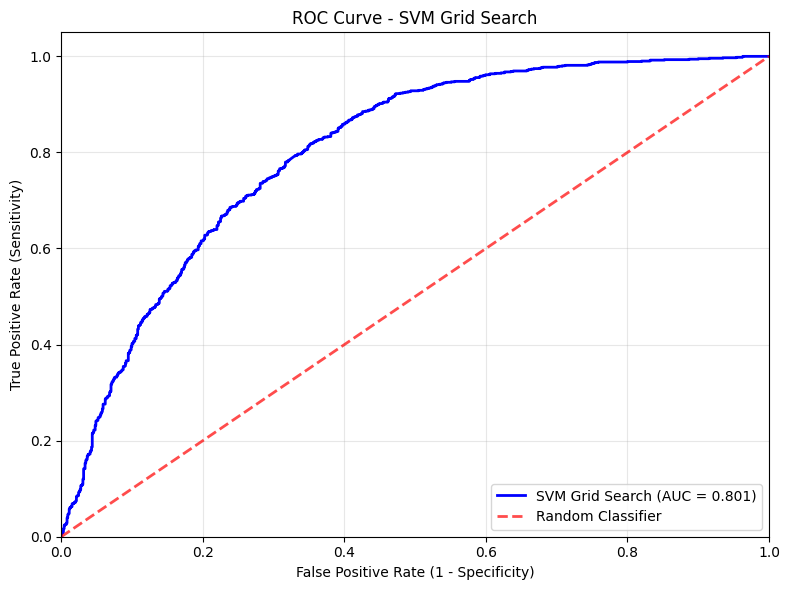

In [33]:
# Plot ROC
evaluate_roc(X_test_scaled, y_test, model=svm_best, model_name='SVM Grid Search')

### i) Fit an MLP
- Optimize the width, depth and learning rate
- Report the accuracy on the test set

In [34]:
# Student code

In [38]:
# Data to tensors
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Convert data to tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [39]:
# Define a simple MLP
from helper import SimpleMLP, train_model

input_size = X_train_scaled.shape[1]
output_size = 1
hidden_size = 32
num_layers = 2


mlp = SimpleMLP(input_size=input_size, output_size=output_size, hidden_size=hidden_size, num_layers=num_layers)

In [41]:
# Train mlp
learning_rate = 0.01

train_loss, test_loss, test_accuracy = train_model(mlp, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, learning_rate=learning_rate, task_type='classification')

=== DETECTED TASK TYPE: CLASSIFICATION ===
Binary classification setup:
  Loss function: BCEWithLogitsLoss()
  Target shape: torch.Size([8000, 1])
  Target values: tensor([0., 1.])

Epoch | Train Loss | Test Loss  | Test Acc | LR
-------------------------------------------------------
    1 |     0.6897 |    0.6824 |   0.6220 | 0.010000
   20 |     0.5083 |    0.5105 |   0.7470 | 0.010000
   40 |     0.5019 |    0.5081 |   0.7485 | 0.010000
   60 |     0.4962 |    0.5080 |   0.7505 | 0.010000
   80 |     0.4915 |    0.5100 |   0.7500 | 0.010000
  100 |     0.4873 |    0.5122 |   0.7480 | 0.010000
  120 |     0.4836 |    0.5150 |   0.7505 | 0.010000
  140 |     0.4799 |    0.5181 |   0.7505 | 0.010000
  160 |     0.4767 |    0.5189 |   0.7530 | 0.010000
  180 |     0.4730 |    0.5222 |   0.7525 | 0.010000
  200 |     0.4691 |    0.5265 |   0.7495 | 0.010000
Training completed!
Final test accuracy: 0.7495


### j) Extract available coefficients and feature importances
- Do they agree across the models?


In [ ]:
# Student code

In [ ]:
# Feature Importances
from helper import coef_feature_importance, simple_feature_importance
import matplotlib.pyplot as plt


C:\Users\janic\AppData\Local\Temp\ipykernel_25872\2187658463.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis', ax=ax)
C:\Users\janic\AppData\Local\Temp\ipykernel_25872\2187658463.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis', ax=ax)
C:\Users\janic\AppData\Local\Temp\ipykernel_25872\2886316273.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='importance', y='f

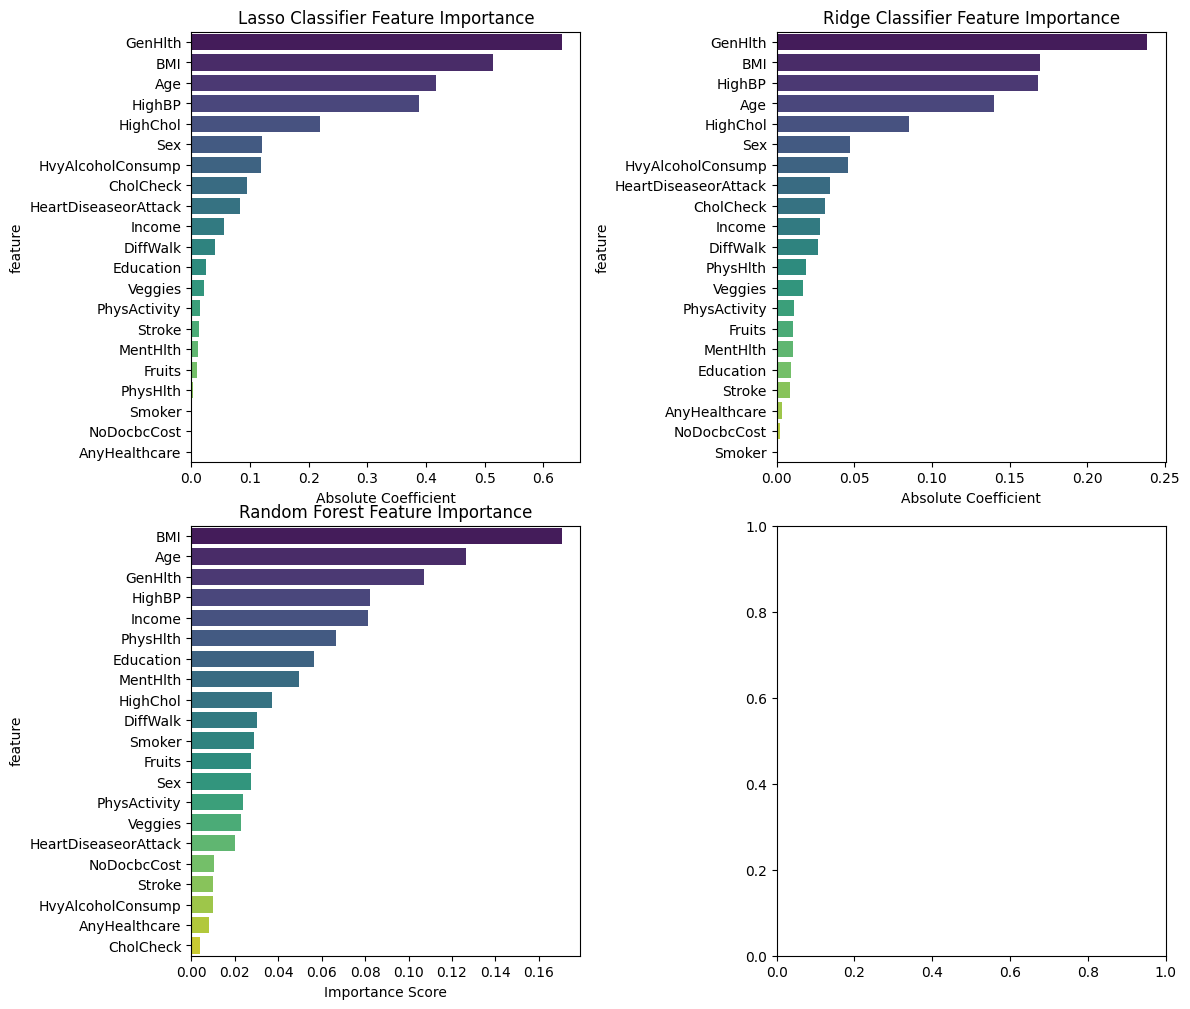

In [52]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
coef_feature_importance(X, lasso_cv, title='Lasso Classifier Feature Importance', ax=ax[0, 0])
coef_feature_importance(X, ridge_cv, title='Ridge Classifier Feature Importance', ax=ax[0, 1])
simple_feature_importance(X, rf, title='Random Forest Feature Importance', ax=ax[1, 0])
# If we use a linear SVM, we can also use coef_feature_importance
#coef_feature_importance(X, svm_best, title='SVM Feature Importance', ax=ax[1, 1])


### k) Which model is the best?
- Based on accuracy and ROC?
- Which model is the fastest?
- Which model is the most interpretable?

#### Your Answer:

In [54]:
import pandas as pd

# All accuracies:
# All accuracies:
accuracies = {
    'Lasso Classifier CV': lasso_cv.score(X_test_scaled, y_test),
    'Ridge Classifier CV': ridge_cv.score(X_test_scaled, y_test),
    'Random Forest': rf.score(X_test_scaled, y_test),
    'SVM Grid Search': svm_best.score(X_test_scaled, y_test),
    'MLP': test_accuracy
}

# Convert to DataFrame for better visualization
acc_df = pd.DataFrame(accuracies.items(), columns=['Model', 'Accuracy'])
acc_df = acc_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)

print("Model Accuracies (Best to Worst):")
print(acc_df)

Model Accuracies (Best to Worst):
                 Model  Accuracy
0                  MLP    0.7495
1  Lasso Classifier CV    0.7490
2      SVM Grid Search    0.7480
3  Ridge Classifier CV    0.7465
4        Random Forest    0.7210


ROC-AUC PERFORMANCE
Lasso:
  Cross-validation AUC: 0.815 (±0.013)
  ROC AUC: 0.814

Ridge:
  Cross-validation AUC: 0.817 (±0.015)
  ROC AUC: 0.815

Random Forest:
  Cross-validation AUC: 0.795 (±0.012)
  ROC AUC: 0.794

SVM Grid Search:
  Cross-validation AUC: 0.802 (±0.010)
  ROC AUC: 0.801



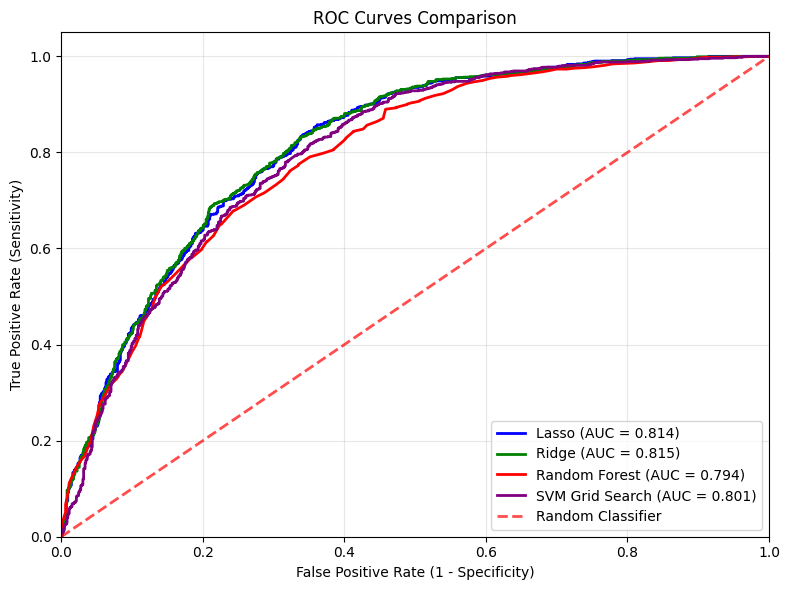

In [55]:
# ROC (for the ones available)
evaluate_roc(X_test_scaled, y_test, models=[lasso_cv, ridge_cv, rf, svm_best], 
             model_names=['Lasso', 'Ridge', 'Random Forest', 'SVM Grid Search'])

#### Solution: